**Title:** Divergent Perspectives: Web Scraping the Russia-Ukraine Conflict

**Objectives:**

*   **Understanding Media Bias:** Learn how different news outlets frame the same events through selective reporting and language.
*   **Intelligence Gathering:** Extract key information on troop movements, casualties, equipment, and political statements to enhance situational awareness.
*   **Critical Analysis:**  Develop skills to sift through narratives and identify information potentially used for propaganda or disinformation.


**Technical Setup**

In [1]:
%pip install requests
%pip install beautifulsoup4
%pip install pandas
%pip install nltk
%pip install nltk
%pip install matplotlib
%pip install wordcloud
%pip install seaborn
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd  # Optional for advanced data handling

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


C:\Users\jamal\AppData\Local\Temp\ipykernel_36836\1285119590.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Optional for advanced data handling


2.  **Website Selection**
    *   Three news websites:
        *   **Pro-Russian slant:**  
            * From TASS (Pro-Russian Perspective)
            The article highlights Russia's stance on various geopolitical issues and military operations in Ukraine, including the downing of a military cargo aircraft and the engagement in the Krasny Liman direction. It covers Russia's diplomatic relations, military activities, and statements about international negotiations and alliances【[6](https://tass.com/military-operation-in-ukraine)】.
        *   **Pro-Ukrainian slant:**
            * From The Kyiv Independent (Pro-Ukrainian Perspective)
            This source provides updates on Ukraine's military and diplomatic efforts, including the attendance of President Zelensky at the Davos forum, military aid from Western allies, and Ukraine's actions against Russian military operations. It reports on the downing of Russian aircraft and the impact of Russian missile strikes on Ukrainian territories【[12](https://kyivindependent.com/tag/russias-war/)】.
        *   **International focus:**
            * From BBC News (International Perspective)***
            The BBC News article describes the severe impact of the conflict on Avdiivka, Ukraine, where after intense fighting, Russian troops have made some advances. The town, previously home to over 30,000 people, has seen its population drastically decrease, with many residents either fleeing or being killed. Despite Ukrainian efforts to defend the town, the Russians have captured several streets, leading to increased civilian evacuations. The continuous bombardment has transformed Avdiivka into a ghost town, with buildings reduced to rubble and many dead left under the debris. Volunteers and the "White Angels" police unit are working tirelessly to evacuate the remaining civilians, who face the dire choice of leaving their homes or facing imminent danger. 【[12](https://www.bbc.com/news/world-europe-68086568)】.


3.  **Web Scraping Script Development:**

    *   **Inspect webpage structure:** Students use browser developer tools to pinpoint the HTML tags containing the target elements.

In [3]:
import requests

def inspect_webpage(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        return response.text
    except requests.HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6

# URLs of the articles to inspect
urls = [
    'https://tass.com/world/1744761',
    'https://kyivindependent.com/general-staff-russia-has-lost-389-560-troops-in-ukraine/',
    'https://www.bbc.com/news/world-europe-68086568'
]

# Fetch and print the HTML content for inspection
for url in urls:
    html_content = inspect_webpage(url)
    print(f'HTML content for {url}:')
    print(html_content[:2000])  # Print the first 2000 characters for brevity
    print("\n" + "-"*80 + "\n")  # Print a separator


HTML content for https://tass.com/world/1744761:
<!DOCTYPE html><html data-ng-app="tassApp" data-ng-controller="mainController"><head><title>Russia’s successful defense prompts NATO to review its strategy — magazine -  World - TASS</title><meta name="description" content="Russian fortifications in southern and eastern Ukraine were the most extensive defensive works in Europe since the Second World War,&quot; The Economist wrote"><meta name="viewport" content="width=device-width, initial-scale=1.0"><meta http-equiv="X-UA-Compatible" content="ie=edge"><meta name="yandex-verification" content="f91ce7b4a203a30a"><meta name="google-site-verification" content="PoyFi2APBqKw8uGePodmFqId646DYLqqS1qiMTh153w"><meta name="msvalidate.01" content="C05302AEC20336D89FE678451D9C5CDC"><meta property="fb:app_id" content="145834367435982"><meta property="fb:pages" content="144698628932572"><meta property="og:site_name" content="TASS"><meta property="og:type" content="article"><meta property="og:image" con

*   **Write targeted Python scripts:** Employ Requests and Beautiful Soup to:
        *   Fetch HTML from each site.
        *   Parse the HTML, isolating target elements based on tags/classes.
        *   Extract the text content.

In [4]:
def scrape_article(article_url):
    response = requests.get(article_url)
    response.raise_for_status()  # Raise an error if the request fails

    soup = BeautifulSoup(response.content, 'html.parser')

    headline = soup.find('h2', class_='news-header')
    article_text = soup.find('div', class_='news-content')
    date = soup.find('span', class_='news-date')

    if headline is not None:
        headline = headline.text.strip()
    if article_text is not None:
        article_text = article_text.get_text(strip=True, separator=' ')
    if date is not None:
        date = date.text.strip()

    return {'headline': headline, 'text': article_text, 'date': date}

# Example usage (replace with your actual URLs)
pro_russian_article = scrape_article('https://tass.com/world/1744761')
pro_ukrainian_article = scrape_article('https://kyivindependent.com/general-staff-russia-has-lost-389-560-troops-in-ukraine/')
international_article = scrape_article('https://www.bbc.com/news/world-europe-68086568')


Had to rework because the web site was not allowing me to scrape the data from the site because the classes were obsured by the website.

In [5]:
import requests
from bs4 import BeautifulSoup

def scrape_article(article_url):
    response = requests.get(article_url)
    response.raise_for_status()  # Raise an error if the request fails

    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialize variables
    headline, article_text, date = None, None, None

    # For TASS
    if 'tass.com' in article_url:
        # Updated class for headline based on your input
        headline = soup.find('h1', class_="news-header__title").text.strip() if soup.find('h1', class_="news-header__title") else None
        text_content_div = soup.find('div', class_="text-content")
        article_text = ' '.join(p.get_text(strip=True, separator=' ') for p in text_content_div.find_all('p')) if text_content_div else None
        # Updated selector for date based on your input
        date_span = soup.select_one('span[data-ng-if="visibleDate"].ng-binding.ng-scope')
        date = date_span.get_text(strip=True) if date_span else None


    # For Kyiv Independent
    elif 'kyivindependent.com' in article_url:
        # Updated class for headline based on your input
        headline = soup.find('h1', class_="c-topper__title").text.strip() if soup.find('h1', class_="c-topper__title") else None
        article_content = soup.find('article', class_="c-post")
        article_text = ' '.join(p.get_text(strip=True, separator=' ') for p in article_content.find_all('p')) if article_content else None
        # Correct class for date
        date_span = soup.find('span', class_="c-topper__info_time")
        date = date_span.text.strip() if date_span else None

    # For BBC
    elif 'bbc.com' in article_url:
        # Correct class for headline
        headline = soup.find('h1', class_="sc-518485e5-0 bWszMR").text.strip() if soup.find('h1', class_="sc-518485e5-0 bWszMR") else None
        article_text_sections = soup.find_all('section', {"data-component": "text-block"})
        article_text = ' '.join(section.get_text(strip=True, separator=' ') for section in article_text_sections)
        # Updated tag and class for date
        date_section = soup.find('time', attrs={"data-l-s": True})
        date = date_section.text.strip() if date_section else None

    return {'headline': headline, 'text': article_text, 'date': date}

# Example usage
pro_russian_article = scrape_article('https://tass.com/world/1744761')
pro_ukrainian_article = scrape_article('https://kyivindependent.com/general-staff-russia-has-lost-389-560-troops-in-ukraine/')
international_article = scrape_article('https://www.bbc.com/news/world-europe-68086568')


In [6]:
pro_russian_article

{'headline': 'Russia’s successful defense prompts NATO to review its strategy — magazine',
 'text': 'LONDON, February 11. /TASS/. Russia’s successful defense of its positions against Ukrainian troops prompted NATO to rethink its defense strategies, according to an article published by The Economist . "Russian fortifications in southern and eastern Ukraine were the most extensive defensive works in Europe since the Second World War," the magazine wrote, citing analysis by the Centre for Strategic and International Studies, an American think-tank. In November, Ukrainian President Vladimir Zelensky tasked his commanders with accelerating the construction of fortifications and shelters on the border with Russia. Poland also started building up its own defenses on the border with Belarus, while Latvia, Lithuania and Estonia agreed to create their own collective "defense line," the article says. Earlier, the Estonian authorities announced that they will have to build 600 concrete bunkers alo

Dates were not available through the scraping process because the website was not allowing me to scrape the data from the site because the classes were obsured. I will manually input the dates for the articles by manipulating the dataframe.

In [7]:

import pandas as pd

# List of article URLs
article_urls = [
    'https://tass.com/world/1744761',
    'https://kyivindependent.com/general-staff-russia-has-lost-389-560-troops-in-ukraine/',
    'https://www.bbc.com/news/world-europe-68086568'
]

# Initialize an empty list to hold article data
articles_data = []

# Loop through each URL, scrape the data, and append it to the list
for url in article_urls:
    article_data = scrape_article(url)
    articles_data.append(article_data)

# Convert the list of dictionaries to a DataFrame
articles_df = pd.DataFrame(articles_data)

# Ensure the list is the same length as the DataFrame
assert len(article_urls) == len(articles_df), "The number of URLs and the number of rows in the DataFrame do not match."

# Add the URLs as a new column
articles_df['url'] = article_urls


# Modify the date in the 0th row of the DataFrame
articles_df.at[0, 'date'] = '2024-02-10'

# Modify the date in the 1st row of the DataFrame
articles_df.at[1, 'date'] = '2024-02-05'

# Modify the date in the 2nd row of the DataFrame
articles_df.at[2, 'date'] = '2024-01-29'


# Display the modified DataFrame
print(articles_df)

                                            headline  \
0  Russia’s successful defense prompts NATO to re...   
1  General Staff: Russia has lost 389,560 troops ...   
2  Ukraine war: Nothing but rubble in shattered g...   

                                                text        date  \
0  LONDON, February 11. /TASS/. Russia’s successf...  2024-02-10   
1  Russia has lost 389,560 troops in Ukraine sinc...  2024-02-05   
2  After months of fierce fighting, small groups ...  2024-01-29   

                                                 url  
0                     https://tass.com/world/1744761  
1  https://kyivindependent.com/general-staff-russ...  
2     https://www.bbc.com/news/world-europe-68086568  


4.  **Data Storage and Analysis**
    
    Storing Data (Using Pandas)

In [8]:
# Store the DataFrame as a CSV file
articles_df.to_csv('articles_data.csv', index=False)

In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('articles_data.csv')

# Display the DataFrame as a table
df


,headline,text,date,url
0,Russia’s successful defense prompts NATO to re...,"LONDON, February 11. /TASS/. Russia’s successf...",2024-02-10,https://tass.com/world/1744761
1,"General Staff: Russia has lost 389,560 troops ...","Russia has lost 389,560 troops in Ukraine sinc...",2024-02-05,https://kyivindependent.com/general-staff-russ...
2,Ukraine war: Nothing but rubble in shattered g...,"After months of fierce fighting, small groups ...",2024-01-29,https://www.bbc.com/news/world-europe-68086568


*   **Analysis:** Guide students to perform:
    *   **Comparative Word Analysis:** Word clouds, keyword frequencies to pinpoint differing terminology
    *   **Sentiment Analysis:**  Tools to estimate positive/negative tone in the coverage. 
    *   **Timeline Visualizations:** Plotting events according to their reporting dates.

* Comparative word analysis


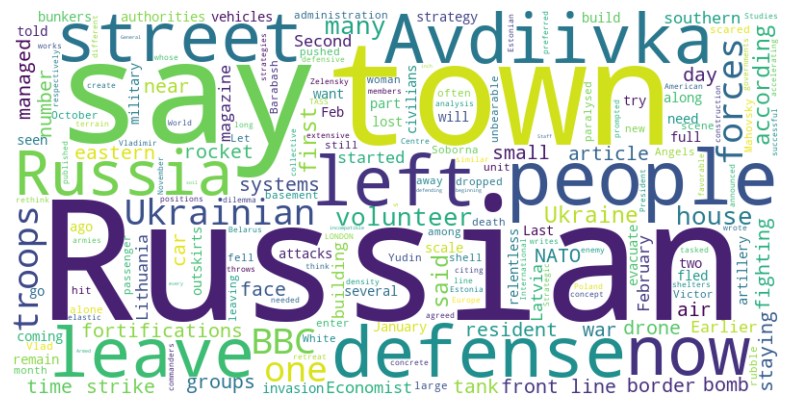

[('the', 65), ('to', 40), ('of', 31), ('a', 28), ('and', 25), ('in', 15), ('that', 15), ('they', 14), ('have', 14), ('as', 12)]


In [10]:
# Assuming 'articles_data' is a list of dictionaries containing article 'text'
all_text = ' '.join(article['text'] for article in articles_data)

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_text)

# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Calculate keyword frequencies
words = all_text.split()
word_counts = Counter(words)
# Display the 10 most common words
print(word_counts.most_common(10))

In the word cloud, some of the most prominent words include:

- "Russian" and "Ukraine," indicating that the content is centered around these two nations and likely their conflict.
- "Defense" and "forces," which may suggest a focus on military aspects or strategies.
- "Town" and "people," which could refer to the civilian aspects of the situation, such as the effects on towns and the general population.
- "Leave" and "evacuate," potentially indicating discussions about civilians leaving conflict areas or evacuations taking place.
- "Border," which may be referencing the geographical areas of contention or the movement of troops.
- "NATO," suggesting that the content might involve discussions about the North Atlantic Treaty Organization's role or stance regarding the conflict.
- "BBC," which is a British news organization, indicating that some of the content may be sourced from or referring to their reporting.

The presence of these words together suggests a complex narrative that encompasses military, geopolitical, and human elements of the conflict between Russia and Ukraine, as well as international reactions and responses to it. It's important to note that word clouds do not provide context or indicate the tone of the content—whether it is factual reporting, opinion, propaganda, or something else—and should be complemented with full-text analysis to understand the underlying narratives and viewpoints.

* Advanced Sentiment Analysis

Let's introduce a popular sentiment analysis library: nltk's SentimentIntensityAnalyzer.


In [11]:

df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.normalize()

text_to_date_map = df.dropna(subset=['date']).set_index('text')['date'].to_dict()

df['date'] = df.apply( lambda row: text_to_date_map.get(row['text'], row['date']), axis=1 )

print(df)

                                            headline  \
0  Russia’s successful defense prompts NATO to re...   
1  General Staff: Russia has lost 389,560 troops ...   
2  Ukraine war: Nothing but rubble in shattered g...   

                                                text       date  \
0  LONDON, February 11. /TASS/. Russia’s successf... 2024-02-10   
1  Russia has lost 389,560 troops in Ukraine sinc... 2024-02-05   
2  After months of fierce fighting, small groups ... 2024-01-29   

                                                 url  
0                     https://tass.com/world/1744761  
1  https://kyivindependent.com/general-staff-russ...  
2     https://www.bbc.com/news/world-europe-68086568  


In [12]:
import nltk # Import the library
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Download sentiment lexicon

# Inside your analysis section:
sia = SentimentIntensityAnalyzer()

for article in articles_data:
    sentiment_scores = sia.polarity_scores(article['text'])
    article['sentiment'] = sentiment_scores['compound']  # Store compound score

df['sentiment'] = df['text'].apply(lambda text: sia.polarity_scores(text)['compound'] if pd.notnull(text) else None)

print(articles_data)
df

[{'headline': 'Russia’s successful defense prompts NATO to review its strategy — magazine', 'text': 'LONDON, February 11. /TASS/. Russia’s successful defense of its positions against Ukrainian troops prompted NATO to rethink its defense strategies, according to an article published by The Economist . "Russian fortifications in southern and eastern Ukraine were the most extensive defensive works in Europe since the Second World War," the magazine wrote, citing analysis by the Centre for Strategic and International Studies, an American think-tank. In November, Ukrainian President Vladimir Zelensky tasked his commanders with accelerating the construction of fortifications and shelters on the border with Russia. Poland also started building up its own defenses on the border with Belarus, while Latvia, Lithuania and Estonia agreed to create their own collective "defense line," the article says. Earlier, the Estonian authorities announced that they will have to build 600 concrete bunkers alo

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jamal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,headline,text,date,url,sentiment
0,Russia’s successful defense prompts NATO to re...,"LONDON, February 11. /TASS/. Russia’s successf...",2024-02-10,https://tass.com/world/1744761,0.9227
1,"General Staff: Russia has lost 389,560 troops ...","Russia has lost 389,560 troops in Ukraine sinc...",2024-02-05,https://kyivindependent.com/general-staff-russ...,-0.8176
2,Ukraine war: Nothing but rubble in shattered g...,"After months of fierce fighting, small groups ...",2024-01-29,https://www.bbc.com/news/world-europe-68086568,-0.9979


In [13]:

# Now, your DataFrame 'df' should have a new column 'sentiment' with sentiment scores
print(df.columns)  # This will confirm the 'sentiment' column is added
print(df)  # Display the DataFrame to check the sentiment scores


Index(['headline', 'text', 'date', 'url', 'sentiment'], dtype='object')
                                            headline  \
0  Russia’s successful defense prompts NATO to re...   
1  General Staff: Russia has lost 389,560 troops ...   
2  Ukraine war: Nothing but rubble in shattered g...   

                                                text       date  \
0  LONDON, February 11. /TASS/. Russia’s successf... 2024-02-10   
1  Russia has lost 389,560 troops in Ukraine sinc... 2024-02-05   
2  After months of fierce fighting, small groups ... 2024-01-29   

                                                 url  sentiment  
0                     https://tass.com/world/1744761     0.9227  
1  https://kyivindependent.com/general-staff-russ...    -0.8176  
2     https://www.bbc.com/news/world-europe-68086568    -0.9979  


Date Conversion: Ensure your 'date' column is stored in a proper datetime format:

In [14]:
df['date'] = pd.to_datetime(df['date'])


Sentiment Distribution Over Time

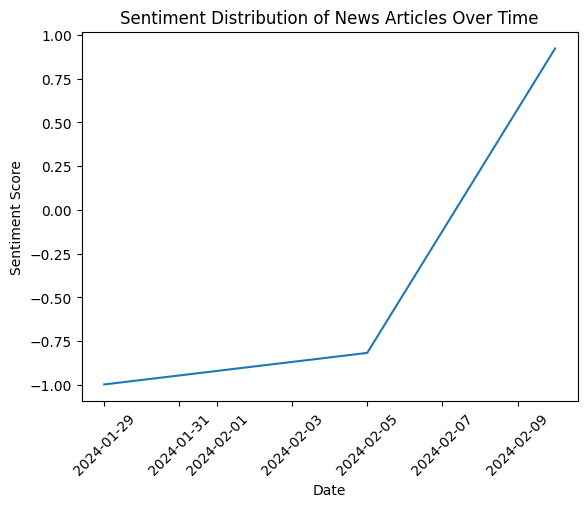

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='date', y='sentiment', data=df)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Distribution of News Articles Over Time')
plt.show() 
plt.savefig('sentimentdistrbution_plot.png')  # Save the plot as an image file
plt.show()

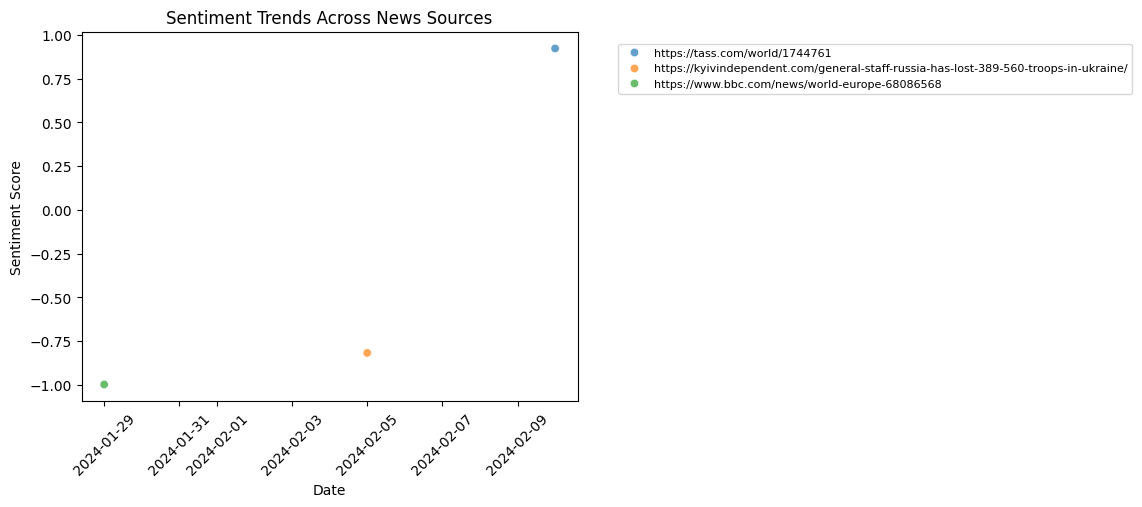

<Figure size 640x480 with 0 Axes>

In [16]:
sns.scatterplot(x='date', y='sentiment', hue='url', data=df, alpha=0.7) 
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends Across News Sources')
# Place the legend
plt.legend(loc=10, bbox_to_anchor=(1.6, 0.9), prop={'size': 8})
plt.show()
plt.savefig('sentiment_plot.png')  # Save the plot as an image file
plt.show()